In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../csv/historico_indices_Oct-24-2020.csv', sep=',', parse_dates=['date'], index_col='date', header=0)


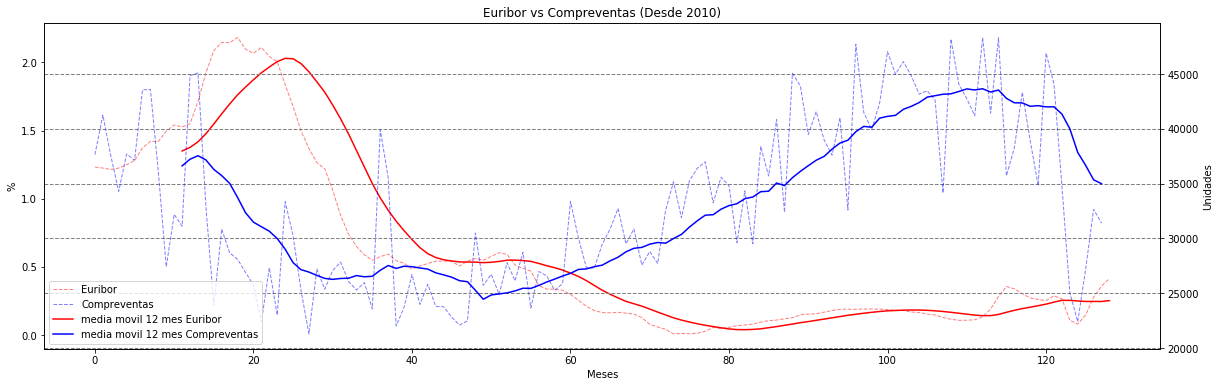

In [13]:
%matplotlib inline

chart = df[df['ano'] > 2009]

fig, ax1 = plt.subplots(figsize = (20, 6))

plt.title("Euribor vs Compreventas (Desde 2010)")
plt.ylabel('%')
plt.xlabel('Meses')

ax2 = ax1.twinx()
plt.ylabel('Unidades')

x = np.array(range(chart.shape[0]))
y_values = chart['euribor']
y_values2 = chart['viviendas']
y_values3 = chart['euribor'].rolling(window=12).mean()
y_values4 = chart['viviendas'].rolling(window=12).mean()

curve1, = ax1.plot(x, y_values, label = 'Euribor', color='r', alpha=0.5, ls="--", lw="1")
curve2, = ax2.plot(x, y_values2, label = 'Compreventas', color='b', alpha=0.5, ls="--", lw="1")
curve3, = ax1.plot(x, y_values3, label = 'media movil 12 mes Euribor', color='r', alpha=1)
curve4, = ax2.plot(x, y_values4, label = 'media movil 12 mes Compreventas', color='b', alpha=1)

curves = [curve1, curve2, curve3, curve4]

ax2.legend(curves, [curve.get_label() for curve in curves], loc = 3)

plt.grid(color='grey', linestyle='--', linewidth=1)

plt.savefig('chart.png')

plt.show()
